# Intro to OOP

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('data/housing_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Python classes

At the risk of oversimplifying, we can think of a `class` as a folder for storing functions and data.

In [93]:
class Folder:
    pass

Now we can add things to the class like so:

In [94]:
# Initialize an instance of the class
folder = Folder()

# Create some data to store in the class
data = [1,2,3]
folder.data = data

Now we can access the data by typing the `folder.data`

In [95]:
folder.data

[1, 2, 3]

We can do this with functions too!

In [96]:
def example():
    return 2

folder.example = example

Now we can call the function!

In [97]:
folder.example()

2

### Above was a light intro to a class, but that is *not* typically how we use them.

We usually define what is in a class upfront, so what is inside the class will already be there when the class is initialized.

We would define the above class like so:

In [102]:
class Folder:
    
    def __init__(self):
        self.data = [1,2,3]
        
    def example(self):
        return 2

In [103]:
defined_folder = Folder()
print(defined_folder.data)
print(defined_folder.example())

[1, 2, 3]
2


### Let's break down what's happening above <img src='images/eyesup.png' style="height:40px">

To define a class:
1. type `class` followed by the name of the class and colons. 
2. Everything inside the class is indented once
3. Whenever you define a function inside a class, you have to pass as the first parameter a variable that represents that actual class object. The standard convention is to use the word `self`. 


### New Vocabulary

* When a function is inside a class, it is called a **method**.
    * In the `Folder` class above, `example` is a *method*.
    * Quick rule of thumb, if the thing needs parentheses, it's a method.
* When a variable is stored inside a class, it is called an **attribute**.
    * In the `Folder` class above, `data` is an *attribute*.
    * Quick rule of thumb, if the thing doesn't need parentheses, it's an attribute.
* You have heard us say the phrase "initialize a model". We **initialize** when we create an **instance** of a class
    * In the code above, `defined_folder = Folder()` is where we *initialize*, and the variable `defined_folder` is considered an *instance* of the `Folder` class.


### <img src='images/what.jpeg' style="height:40px"> WTF is `__init__`?????

`__init__` is a something called a **[Python Magic Method](https://rszalski.github.io/magicmethods/)**. For now, we are not going to talk too much about magic methods, but the idea of magic methods is that they do fancy-things™. `__init__`'s fancy thing is that everything inside the `__init__` method activates *when an instance of a class is initialized*. 
* By a land slide, `__init__` is the most common magic method used.
    * If you have code that you want to be run when an instance is created, you will probably need an `__init__` method.
    * Basic use case of `__init__` is creating variables that the methods of a class will end up used. 

**Other stuff**
* magic methods are always surrounded by double underscores.
* The word *method* is in the phrase "Python Magic Method". ie, it is just a class function.
* Magic methods *truly* are magic. I highly recommend checking out the linked article!

## We can make our classes speak to each other!

Intro to **inheritance**. 

It's helpful to think of code as instructions for managing different situations. Sometimes we have code that applies to *all* situations, and then code that we want to apply to specific situations. That's where inheritance can become really handy. 

In [118]:
class EveryWeekDay:
    
    def __init__(self):
        self.wake_up = '7:30am'
        self.bed_time = '11:00pm'
        self.lunch = '12:00pm'
        self.other_tasks = None
        self.morning_tasks = ['brush teeth', 'shower', 'caffeine', 'drive to work', 'say hi to class', 'release checkpoint']
        self.evening_tasks = ['record warmdown video', 'eat dinner', 'play smash brothers', 'do dishes', 'brush teeth']
        
    def print_schedule(self):
        print('====== Morning ======')
        print('Alarm:', self.wake_up)
        for task in self.morning_tasks:
            print('    -', task)
        print('=====================')
        print('Lunch time:', self.lunch)
        print('=====================')
        print()
        if self.other_tasks:
            print('==== Other Tasks ====')
            for task in self.other_tasks:
                print('    -', task)
            print('=====================')
        print()
        print('====== Evening ======')
        for task in self.evening_tasks:
            print('    -', task)
        print('=====================')
        print()
        print('Bed time:', self.bed_time)
        
class Wendesday(EveryWeekDay):
    
    def __init__(self):
        EveryWeekDay.__init__(self)
        self.evening_tasks.append('go to gym')
        
class Thursday(EveryWeekDay):
    
    def __init__(self):
        EveryWeekDay.__init__(self)
        self.bed_time = '12:00am'
        
class EndOfPhaseFriday(EveryWeekDay):
    
    def __init__(self):
        EveryWeekDay.__init__(self)
        self.morning_tasks.remove('release checkpoint')
        self.morning_tasks.append('release code challenge')
        self.other_tasks = ['create project groups']

In [119]:
friday = EndOfPhaseFriday()
friday.print_schedule()

====== Morning ======
Alarm: 7:30am
    - brush teeth
    - shower
    - caffeine
    - drive to work
    - say hi to class
    - release code challenge
Lunch time: 12:00pm

==== Other Tasks ====
    - create project groups

====== Evening ======
    - record warmdown video
    - eat dinner
    - play smash brothers
    - do dishes
    - brush teeth

Bed time: 11:00pm


In [85]:
class VisualizationData:
    
    def __init__(self, data):
        # Create a variable set to the data argument
        
        # Create a target attribute

        
    def scatter_dependent(self, column_name):

    
    def top_5_average_zipcodes(self):

    
    def map_top_5_zipcodes(self):

    
class Visualize(VisualizationData):
    
    def __init__(self, data):

        
    def figure(self):

        
    def visual_1(self):

        
    def visual_2(self):

        
    def visual_3(self):


In [86]:
viz = Visualize(df)

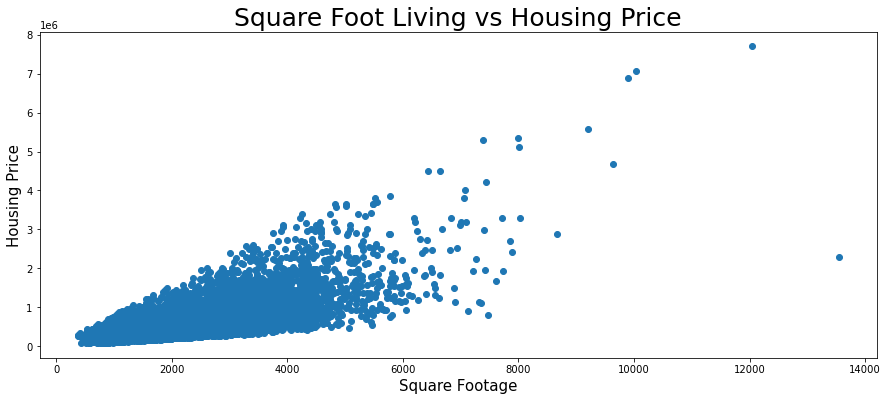

In [87]:
viz.visual_1()

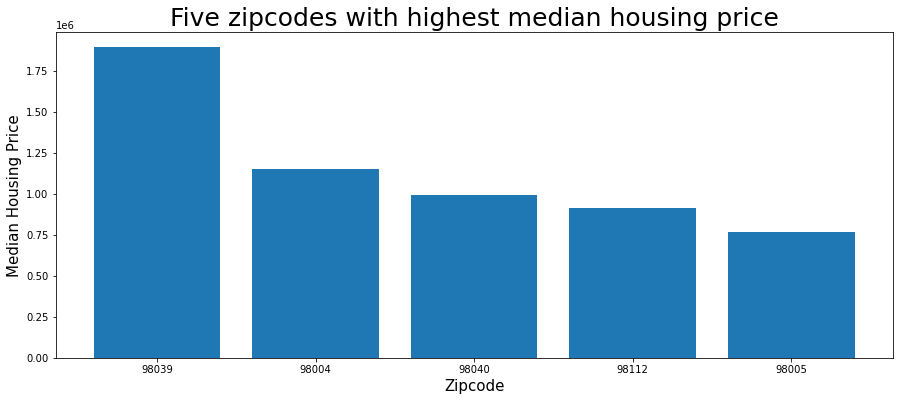

In [88]:
viz.visual_2()

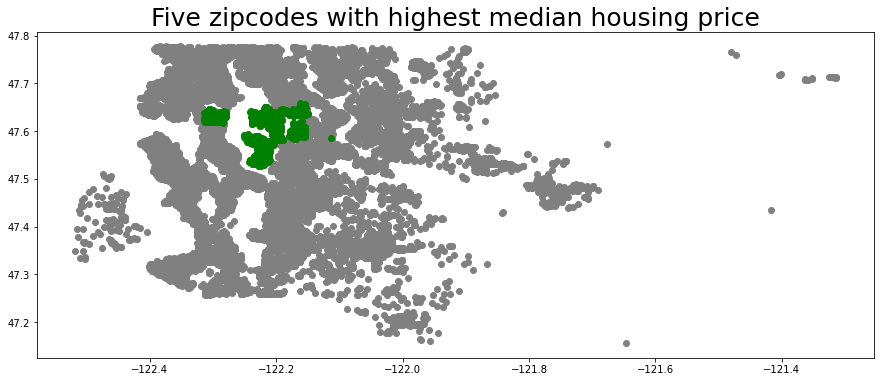

In [89]:
viz.visual_3()